In [14]:
%load_ext autoreload
%autoreload 2

from collections import defaultdict

import glob
import os
import sys

import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc
import seaborn as sns
import yaml


# sys.path.append('/home/olga/code/xspecies--olgabot/refactor-bladder-blood-lung-muscle/xspecies/')

# Handwritten modules
import preprocess

from plot_utils import save_figures

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# ! cp /home/olga/code/xspecies--olgabot/refactor-bladder-blood-lung-muscle/xspecies/preprocess.py .

## Constants

In [3]:
tissue = 'blood'

umap_plot_kws = dict(color=['species', 'compartment_group', 'broad_group'], ncols=2)
celltype_col = 'narrow_group'
species_col = 'species'
compartment_col = 'compartment_group'

object_dir = '/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species'

output_file = os.path.join(object_dir, f'concatenated__human-lemur-mouse_10x__one2one_orthologs__{tissue}__preprocessed.h5ad')

min_cells_per_celltype = 15

## Set scanpy savefig options

In [4]:

xspecies_figure_folder = '/home/olga/googledrive/TabulaMicrocebus/analysis/cross-species--bladder-blood-lung-muscle'

figure_folder = os.path.join(xspecies_figure_folder, tissue, 'preprocess')

sc._settings.ScanpyConfig(autosave=True, figdir=figure_folder, autoshow=True)
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "Arial"

sc.settings.autosave = True
sc.settings.autoshow = True
sc.settings.figdir = figure_folder

# Load data

## Unprocessed data

In [5]:
h5ad = os.path.join(object_dir, f'concatenated__human-lemur-mouse_10x__one2one_orthologs__{tissue}.h5ad')


adata = sc.read(h5ad, cache=True)

# Remove sapiens
adata = adata[adata.obs.species_batch != 'human_sapiens']
adata

View of AnnData object with n_obs × n_vars = 65735 × 13302
    obs: 'age', 'cell_id', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'sex', 'subtissue', 'tissue', 'species', 'species_latin', 'channel', 'sequencing_run', 'cell_barcode', 'n_counts', 'individual', 'narrow_group', 'broad_group', 'compartment_group', 'cell_id_v1', 'cell_id_v2', 'species_batch'
    var: 'mouse_lemur__gene_name-human_hlca', 'mouse__gene_name-human_hlca', 'ensembl_id-human_sapiens', 'len-human_sapiens', 'mouse_lemur__gene_name-lemur', 'mouse__gene_name-lemur', 'name-lemur', 'highly_variable-lemur', 'mouse_lemur__gene_name-mouse_ce', 'mouse__gene_name-mouse_ce', 'n_cells-mouse_tabula_muris_senis', 'mouse_lemur__gene_name-mouse_tabula_muris_senis', 'mouse__gene_name-mouse_tabula_muris_senis'

In [6]:
for key in adata.uns.keys():
    if key.endswith('colors'):
        del adata.uns[key]

In [7]:
preprocess.plot_constants.SPECIES_PALETTE

['#ff7f0e', '#2ca02c', '#1f77b4']

In [8]:
adata.uns['species_colors'] = preprocess.plot_constants.SPECIES_PALETTE

Trying to set attribute `.uns` of view, copying.


... storing 'compartment_broad' as categorical
... storing 'compartment_narrow' as categorical
... storing 'compartment_broad_narrow' as categorical
... storing 'compartment_species' as categorical
... storing 'compartment_narrow_species' as categorical
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


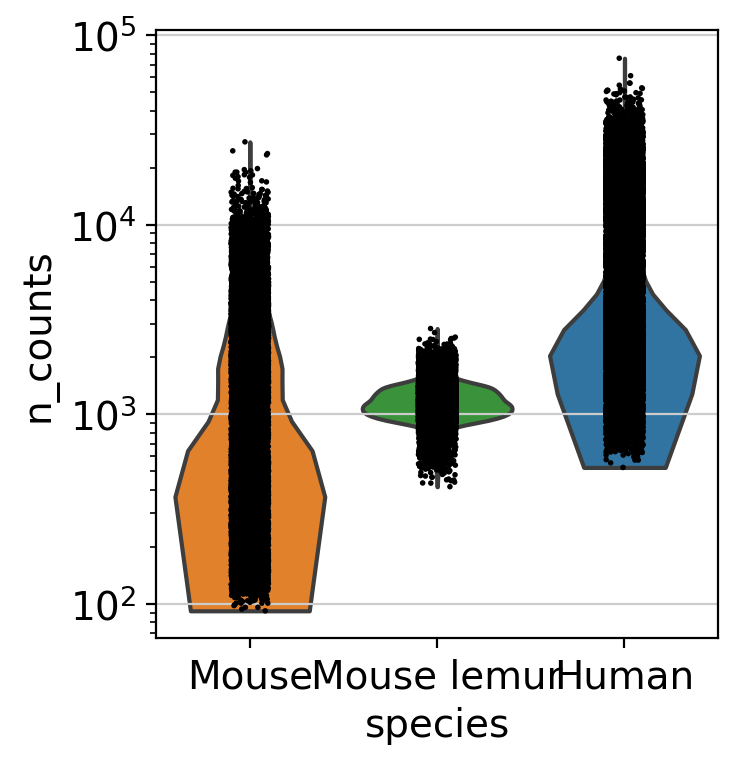

<Figure size 800x800 with 0 Axes>

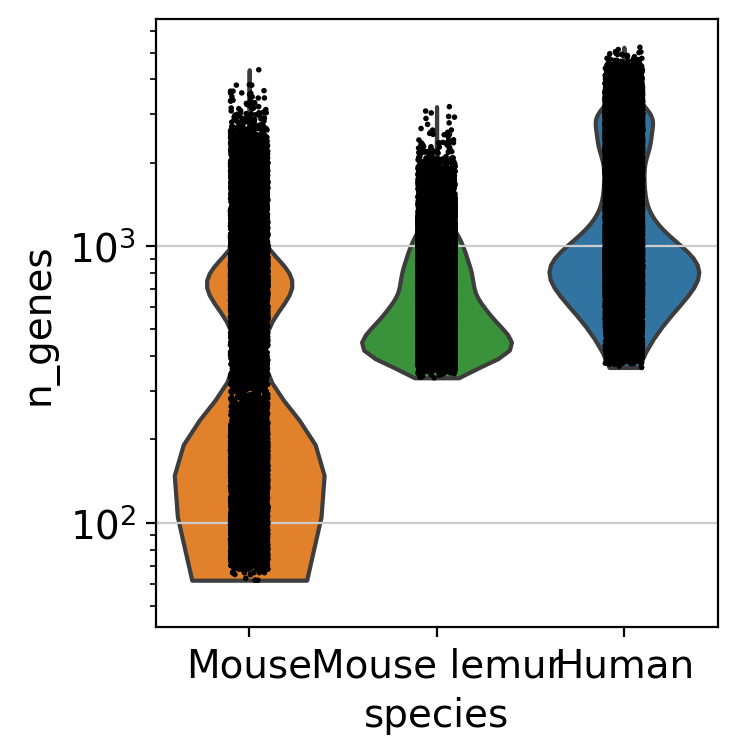

<Figure size 800x800 with 0 Axes>

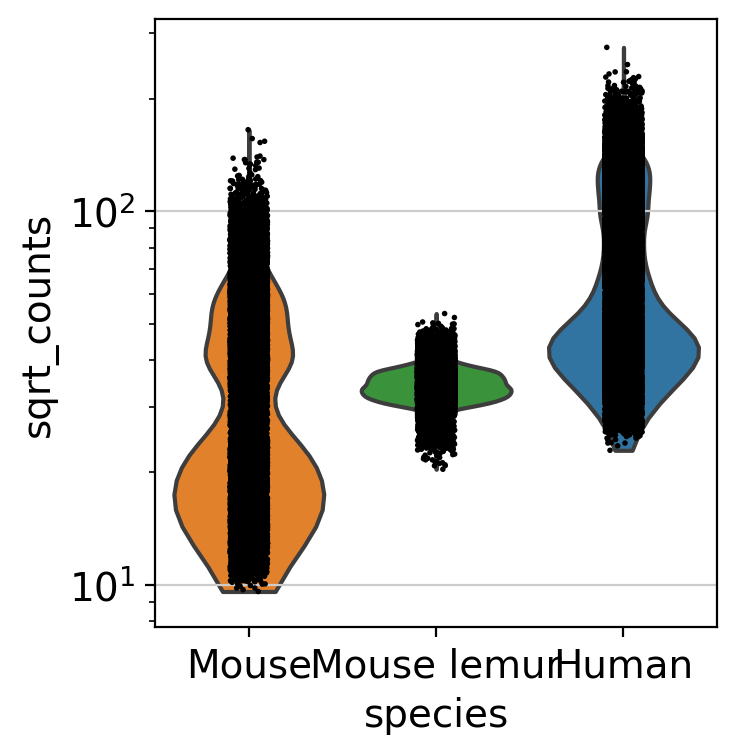

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


<Figure size 800x800 with 0 Axes>

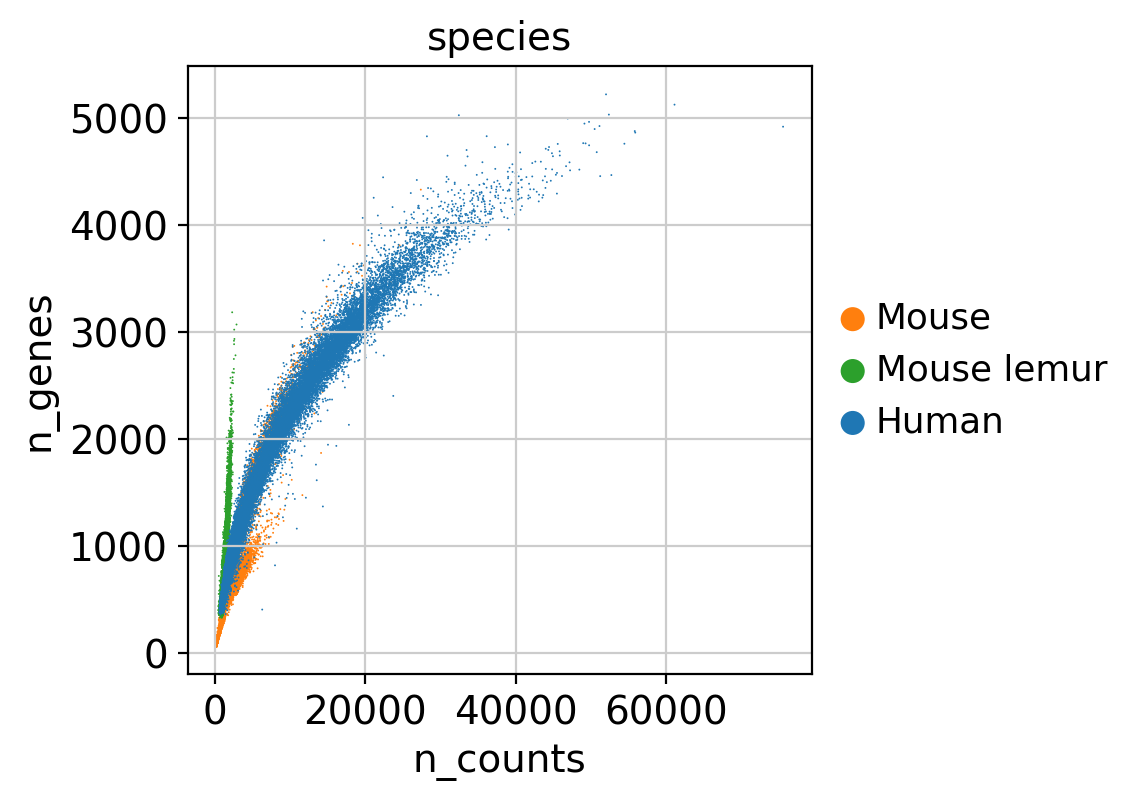

<Figure size 800x800 with 0 Axes>

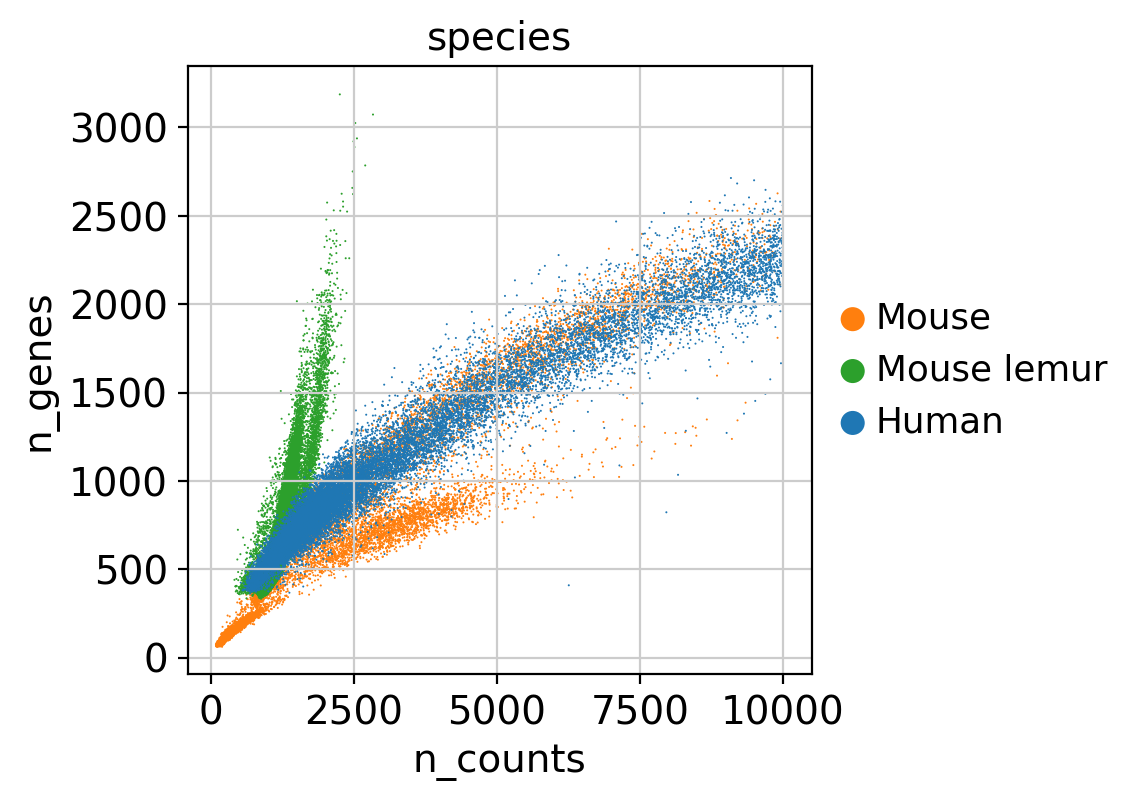

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 800x800 with 0 Axes>

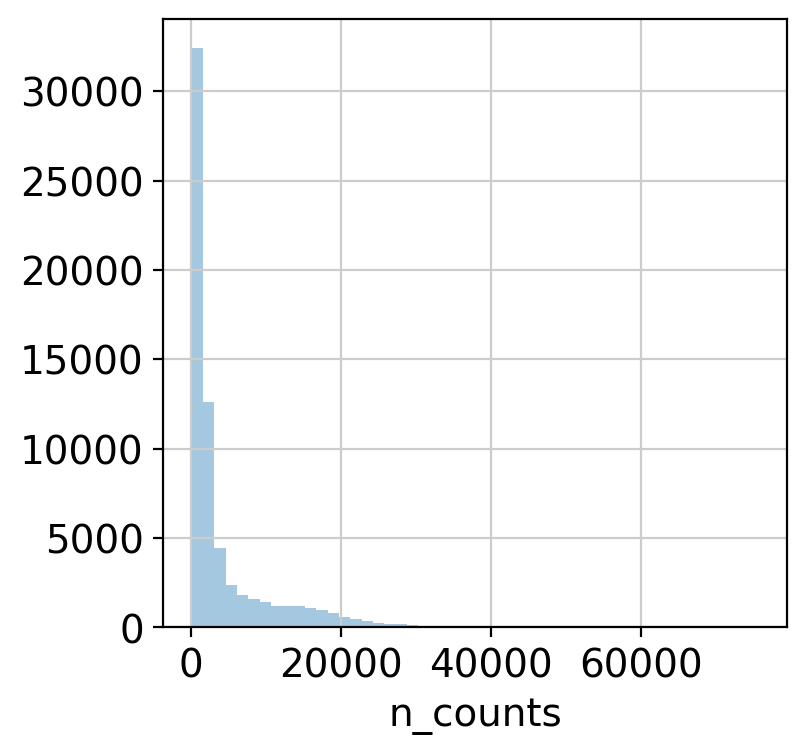

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


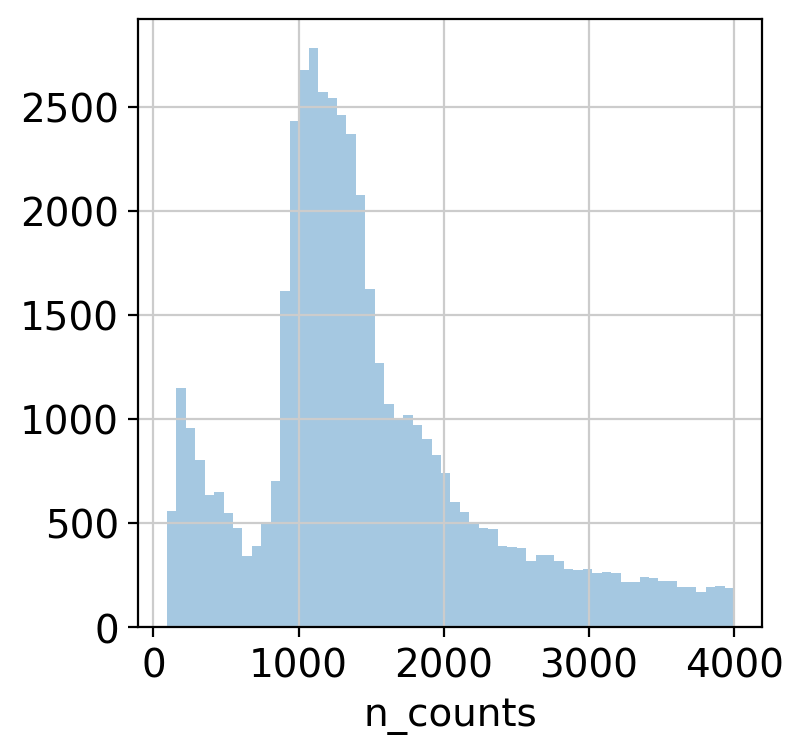

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


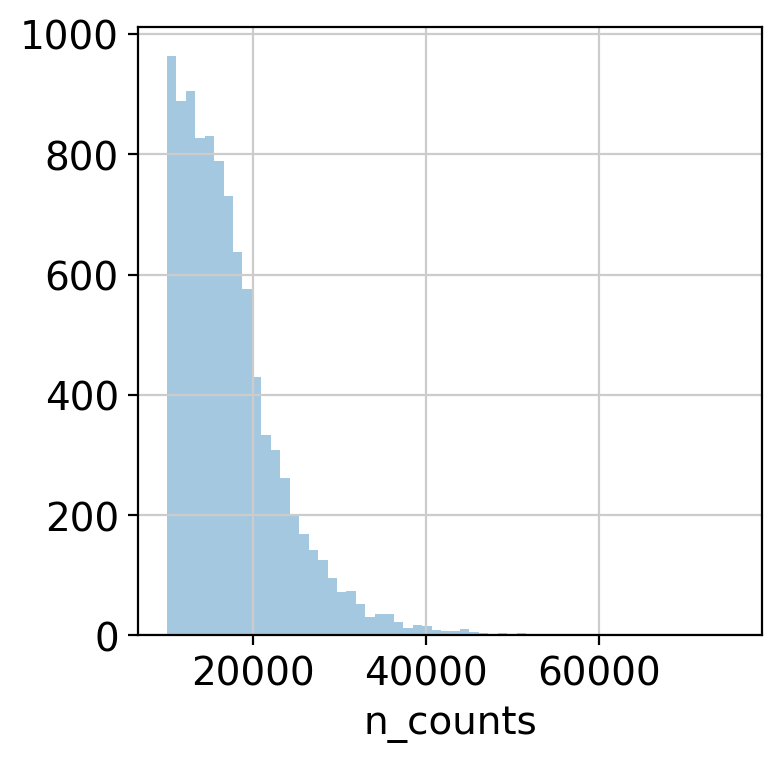

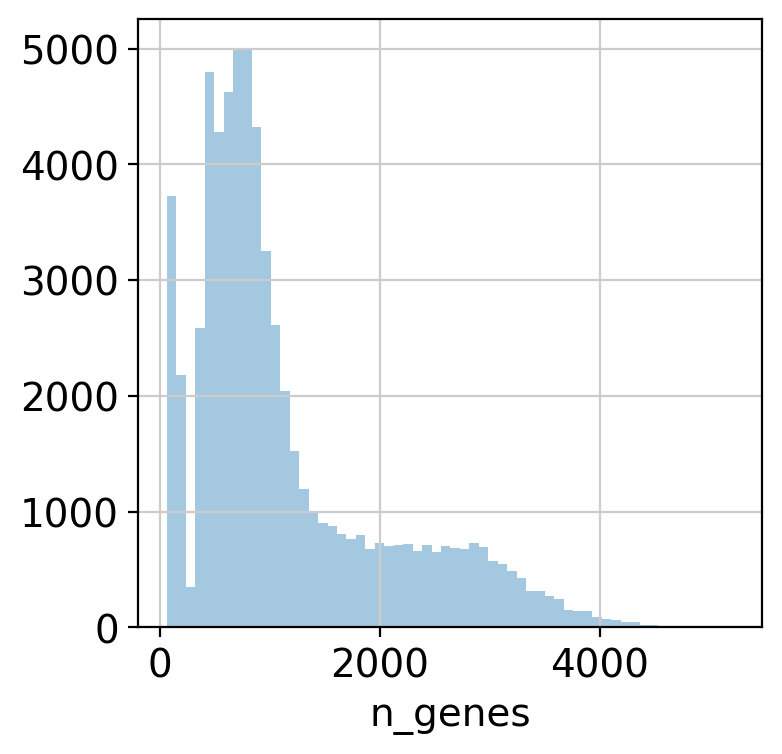

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


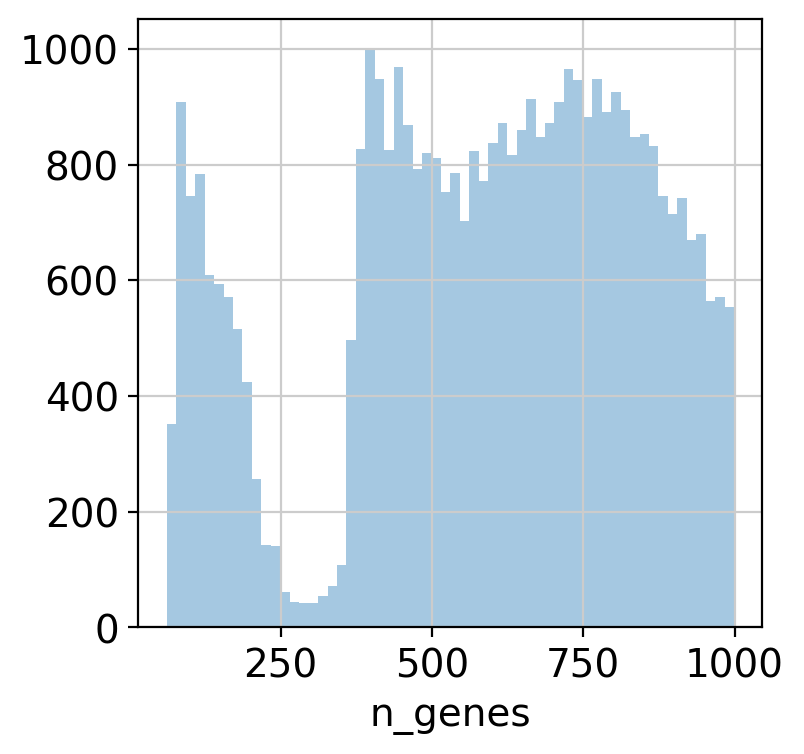

filtered out 11637 cells that have less than 1000 counts


Total number of cells: 65735
Number of cells after min count filter: 54098
Number of cells after gene filter: 54098
Total number of genes: 13302


filtered out 806 genes that are detected in less than 3 cells
normalizing counts per cell


Number of genes after cell filter: 12496


    finished (0:00:00)


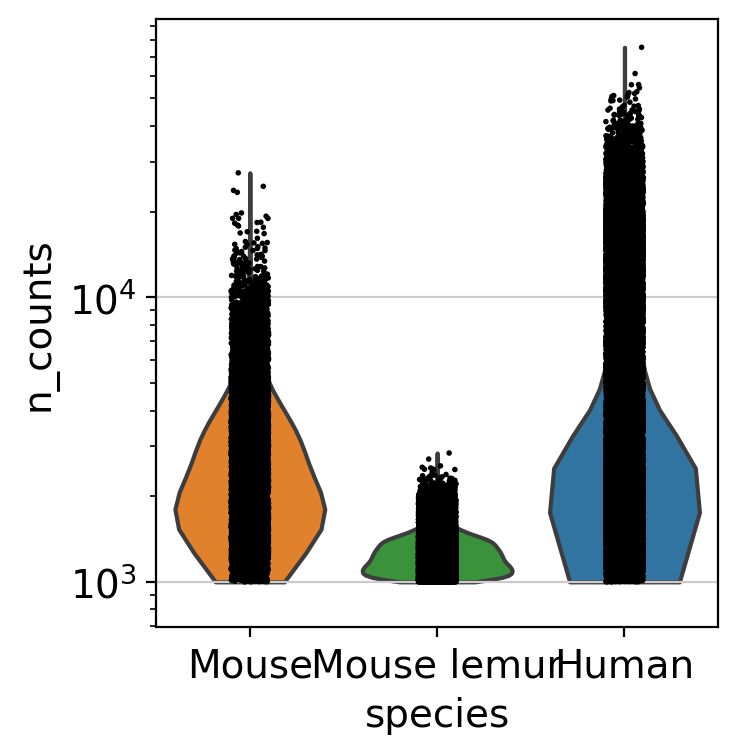

<Figure size 800x800 with 0 Axes>

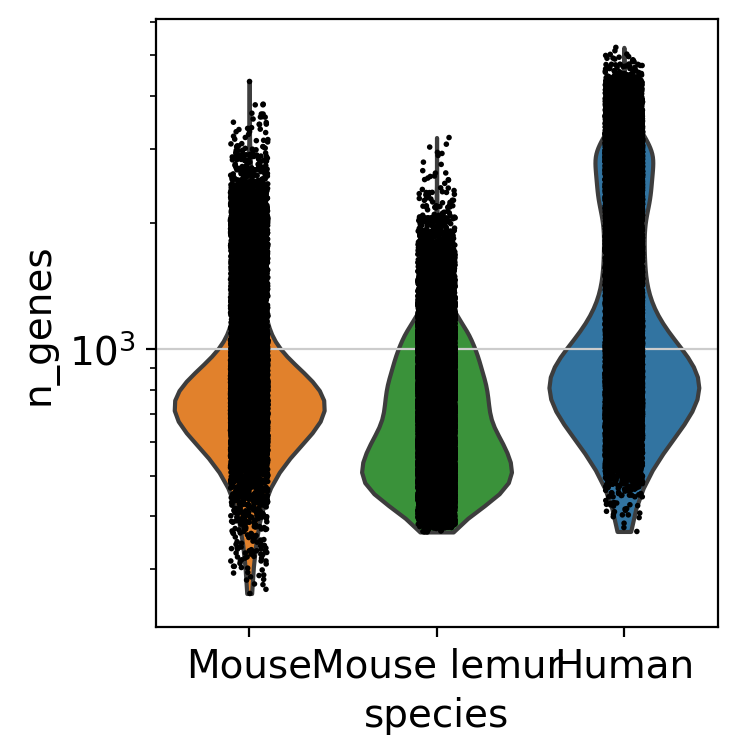

<Figure size 800x800 with 0 Axes>

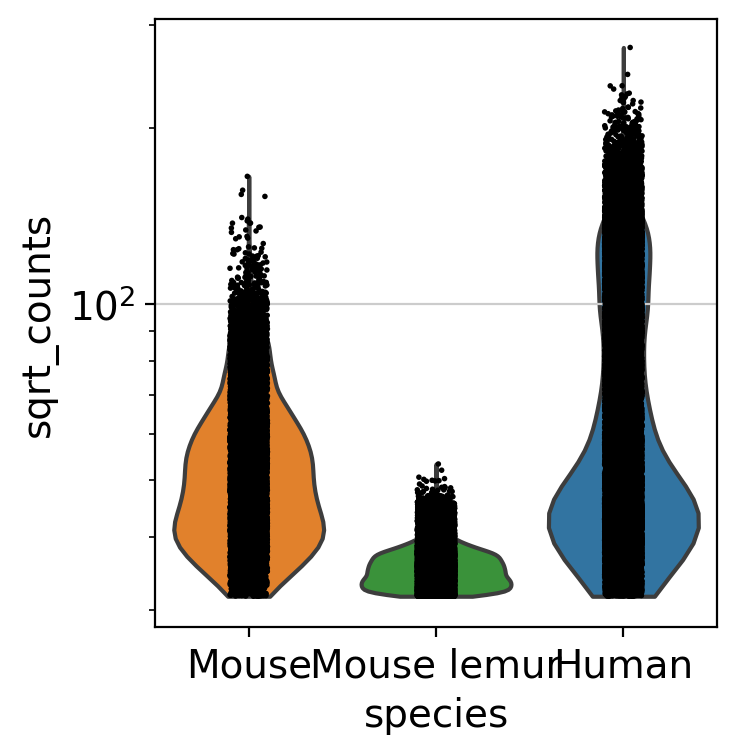

<Figure size 800x800 with 0 Axes>

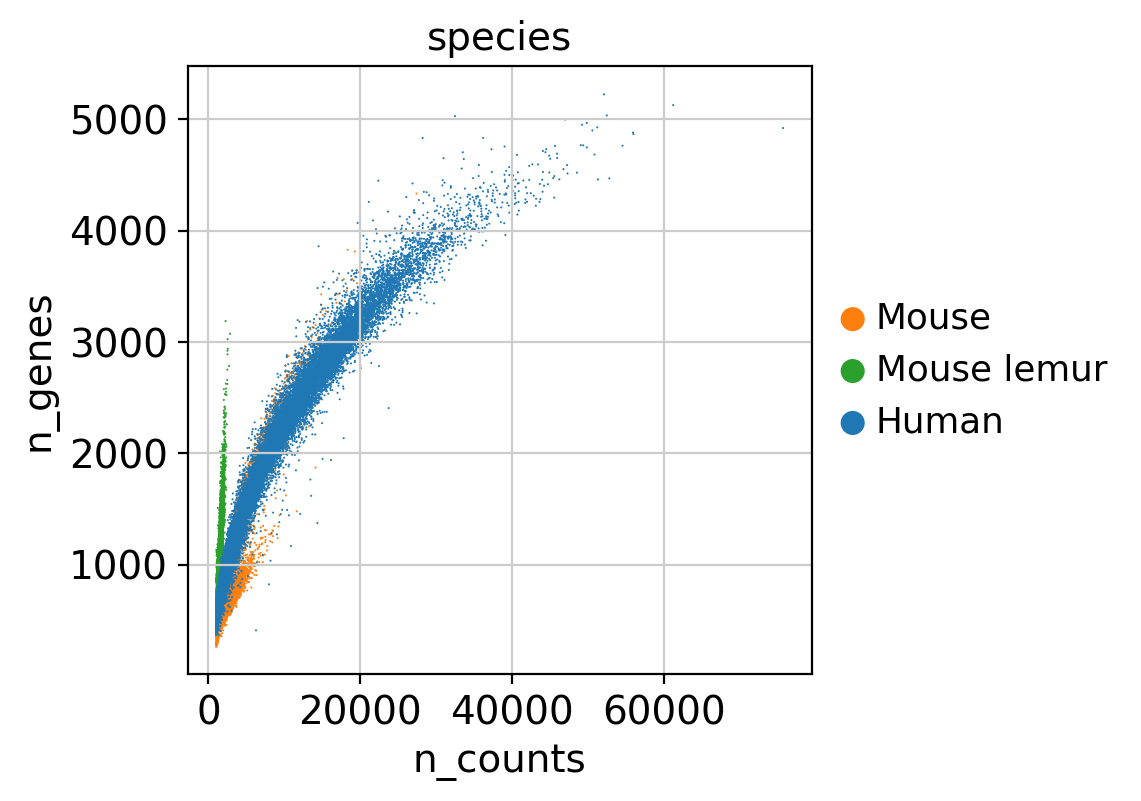

<Figure size 800x800 with 0 Axes>

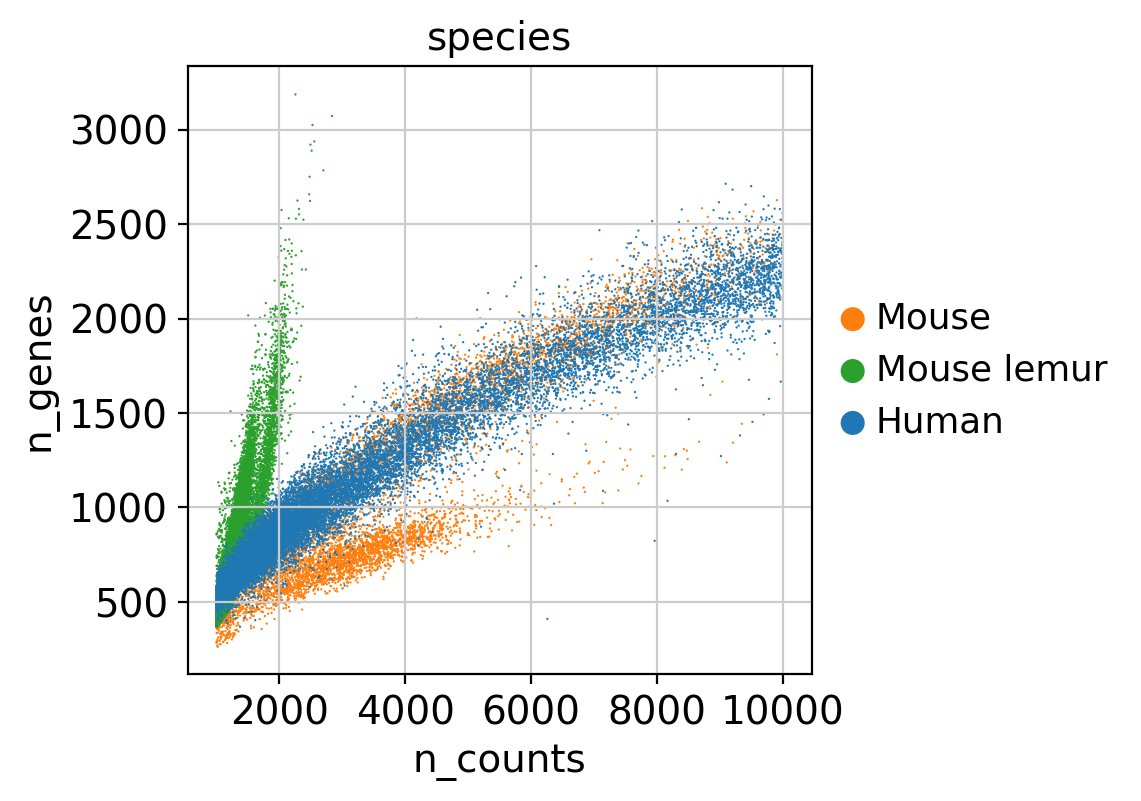

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 800x800 with 0 Axes>

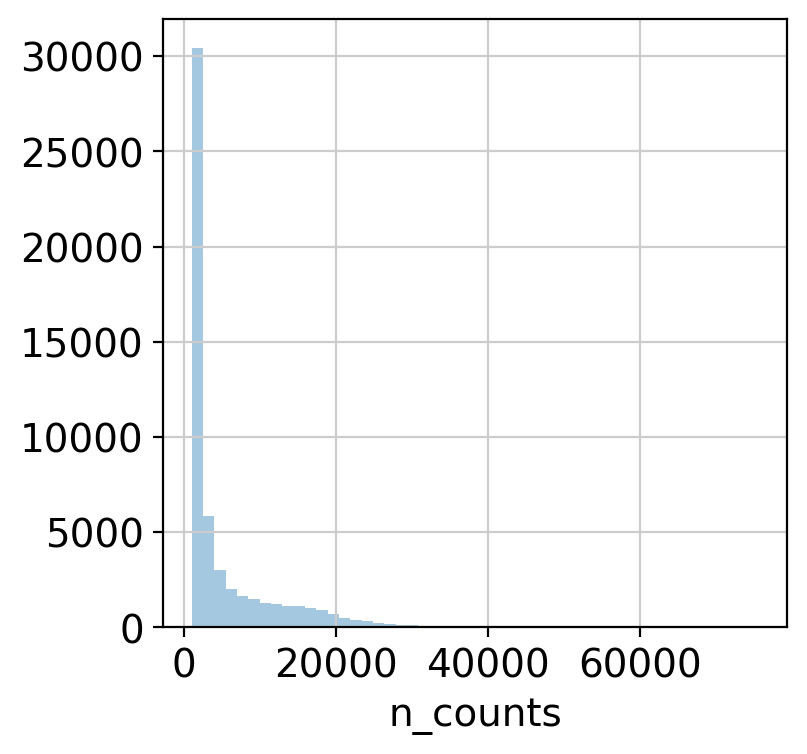

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


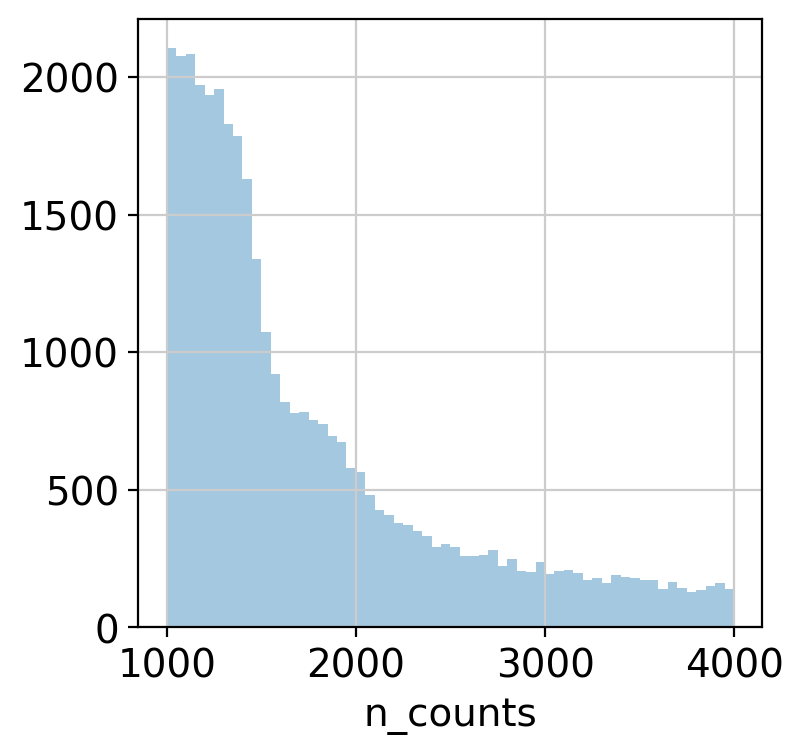

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


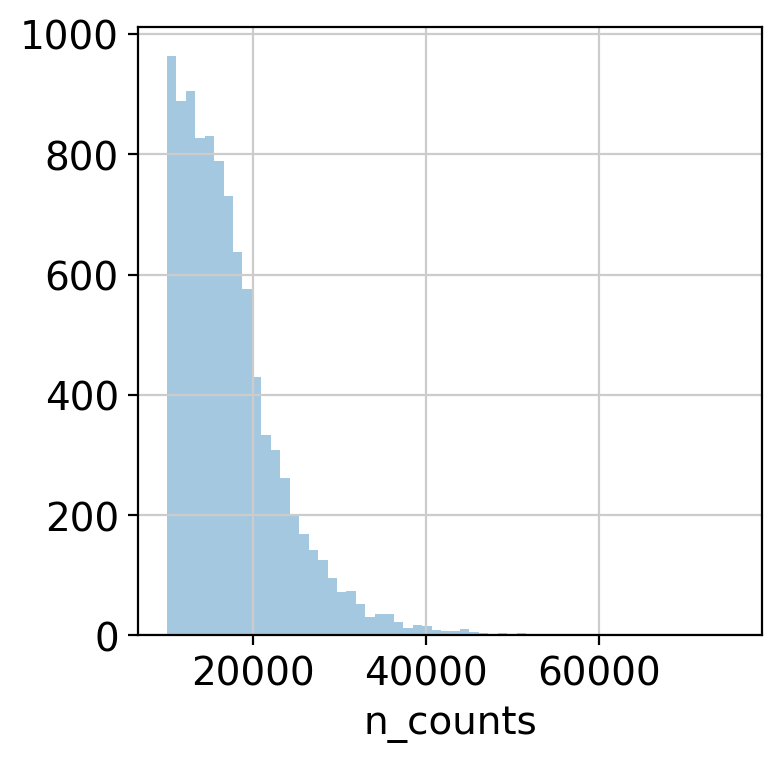

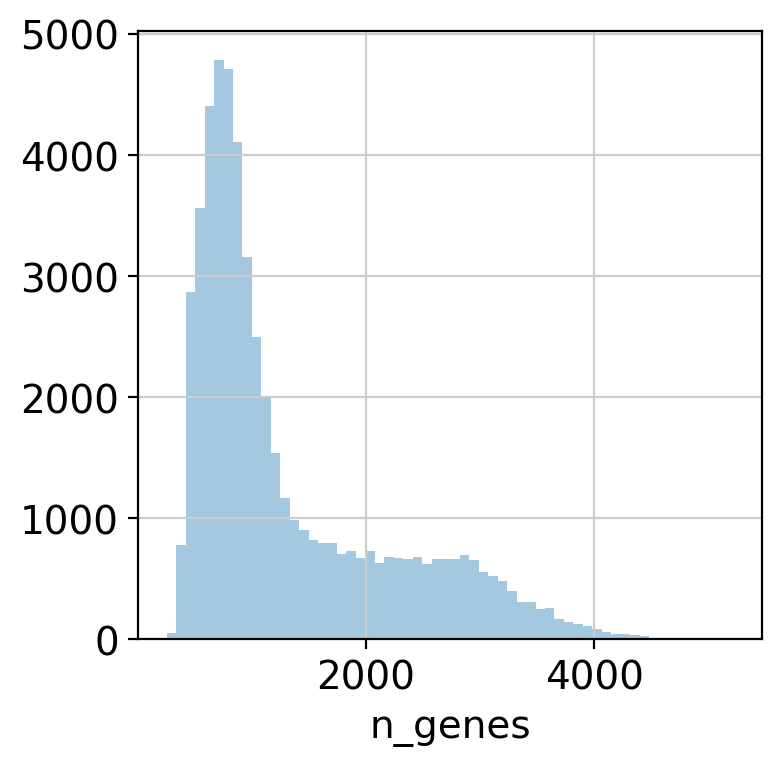

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


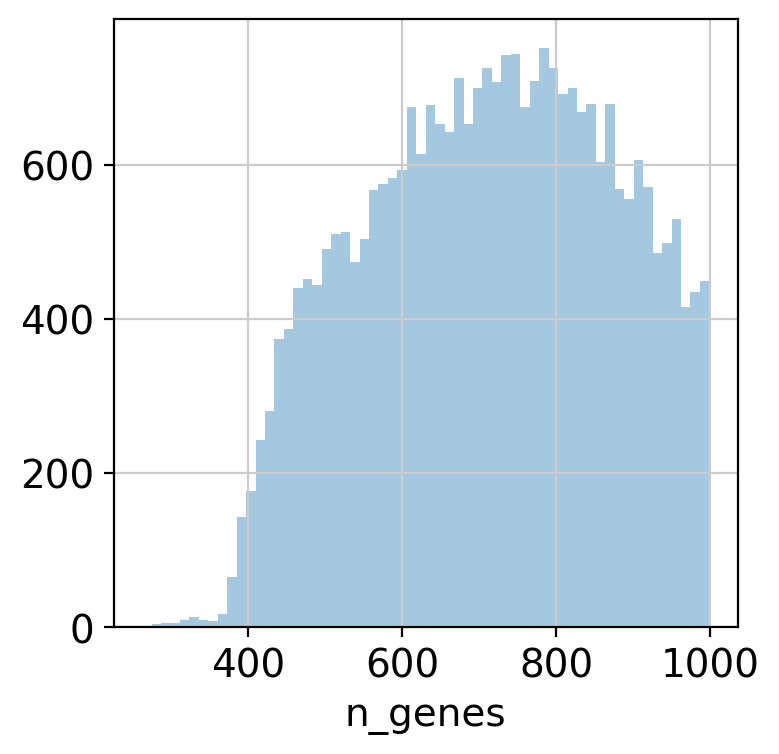

In [9]:
adata = preprocess.add_compartment_combined_cols(adata)
adata = preprocess.filter_genes_cells(adata)


# Plot shared cell types

In [10]:
adata.uns['species_colors'] = preprocess.plot_constants.SPECIES_PALETTE

In [11]:
min_cells_per_celltype

15

In [12]:


adata = preprocess.filter_min_cells_per_group(
    adata,
    celltype_col=celltype_col,
    species_col=species_col,
    min_cells_per_celltype=min_cells_per_celltype,
)


Filtering for celltype column narrow_group with at least 15 cells per species
--- Before filtering ---
-- Number of cell types: 33 --
narrow_group                              species    
B cell                                    Mouse           1834
                                          Mouse lemur      674
                                          Human            230
CD4+ T cell                               Mouse            570
                                          Mouse lemur     1645
                                          Human           2297
CD8+ T cell                               Mouse            467
                                          Mouse lemur      153
                                          Human           1942
CXCR6+ T cell                             Mouse             19
                                          Mouse lemur        0
                                          Human              0
EREG+ dendritic cell                      Mouse         

## Plot shared cell tyeps

(18, 4)
--- compartment: lymphoid ---


/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/axisgrid.py:49: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set(**kwargs)
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/axisgrid.py:49: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  a

--- compartment: myeloid ---


Saving figures: 100%|██████████| 2/2 [00:06<00:00,  3.38s/it]


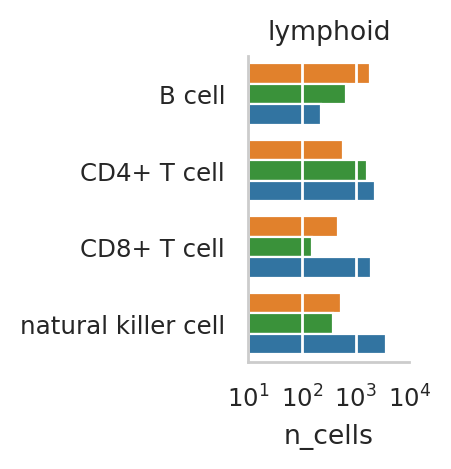

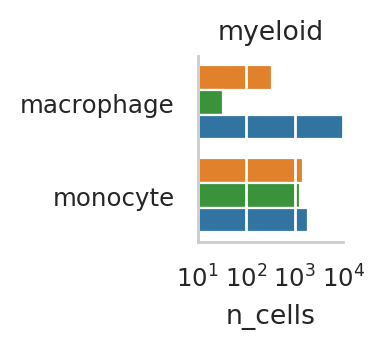

In [15]:
preprocess.plot_shared_cell_types(adata, celltype_col, compartment_col, species_col)
save_figures(os.path.join(figure_folder, 'shared_cell_types'))

# Dimensionality reduction

## Do PCA + k-nearest neighbors pre-batch correction with BBKNN

extracting highly variable genes
    finished (0:00:02)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 2769


    finished (0:00:09)


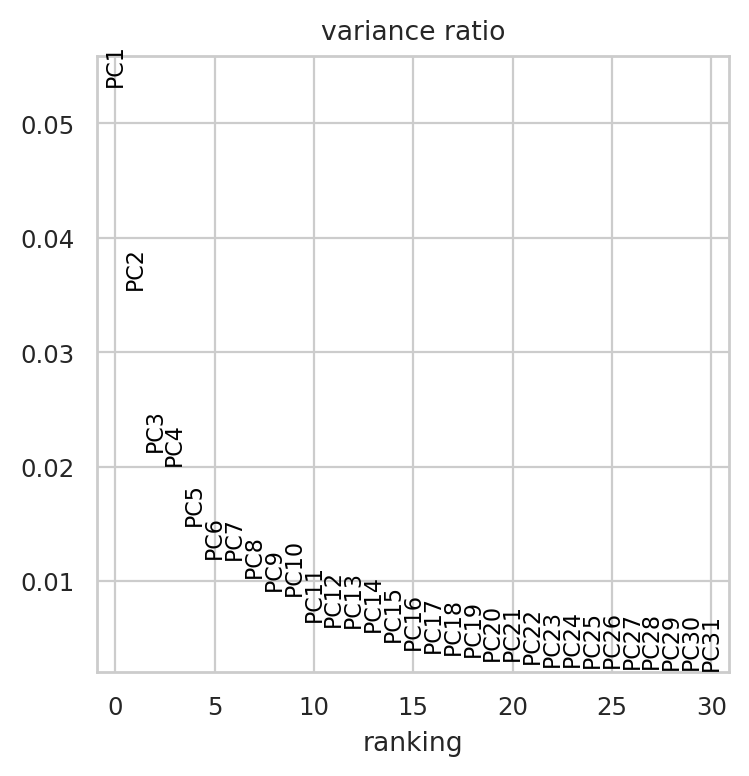

<Figure size 800x800 with 0 Axes>

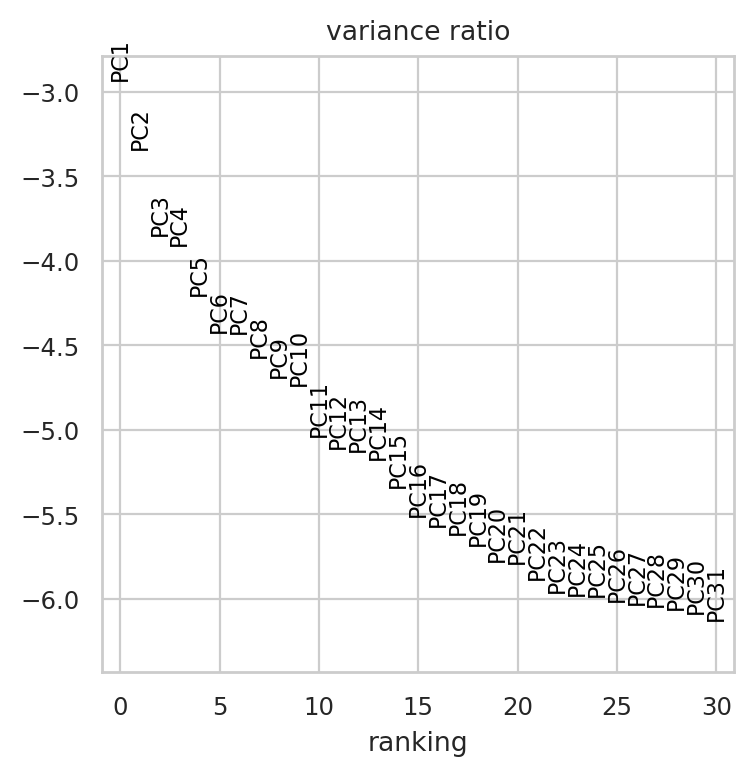

computing PCA
    on highly variable genes
    with n_comps=40
    finished (0:00:06)
computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:15)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:34)


<Figure size 800x800 with 0 Axes>

In [16]:
adata = preprocess.dimensionality_reduction(adata)

## Pre-BBKNN UMAPs

In [17]:
preprocess.remove_color_palettes(adata)

removing 'species_colors'


In [18]:
adata.obs['age'] = adata.obs['age'].astype(str)

In [19]:
# preprocess.plot_umaps(adata)

## Do BBKNN, draw new umaps

In [20]:
preprocess.run_bbknn(adata)

computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:20)


### Post-BBKNN UMAPs

In [21]:
# preprocess.plot_umaps(adata)

In [22]:
preprocess.remove_color_palettes(adata)

### Species

... storing 'age' as categorical


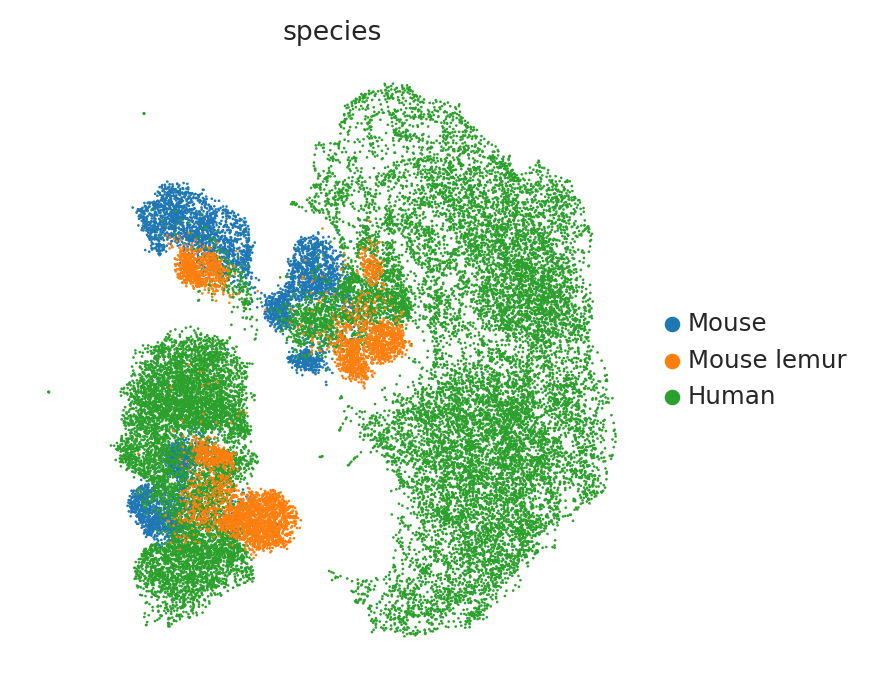

In [25]:
try:
    del adata.uns['species_colors']
except KeyError:
    pass
tab10 = sns.color_palette('tab10')
sc.pl.umap(adata, color='species', palette=tab10[:3], save='__species')

### Compartment group

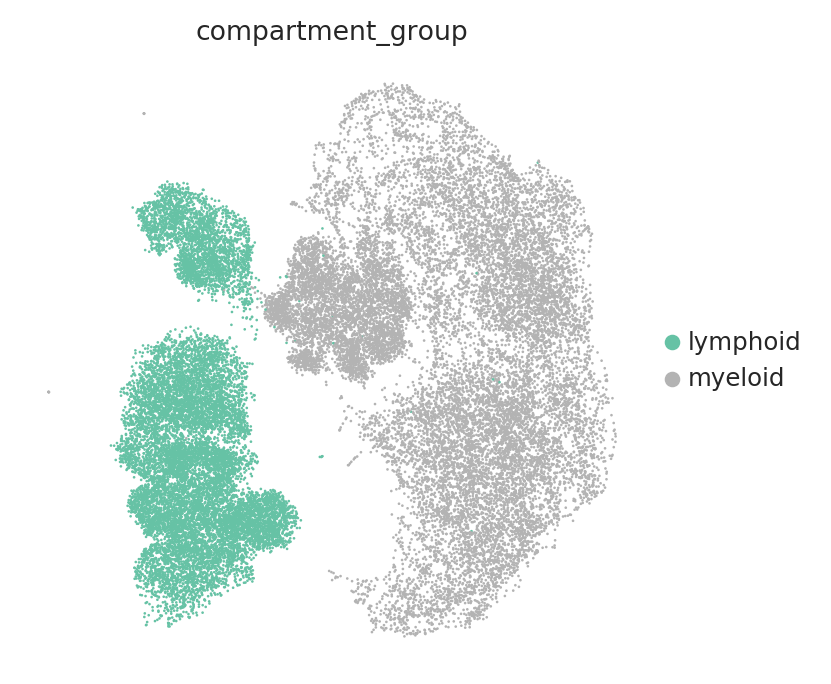

In [26]:
# there is some bug when the palette is pre-set
try:
    del adata.uns['compartment_group_colors']
except KeyError:
    pass

sc.pl.umap(adata, color='compartment_group', save='__compartment_group', palette='Set2')

### Narrow group

removing 'species_colors'
removing 'compartment_group_colors'


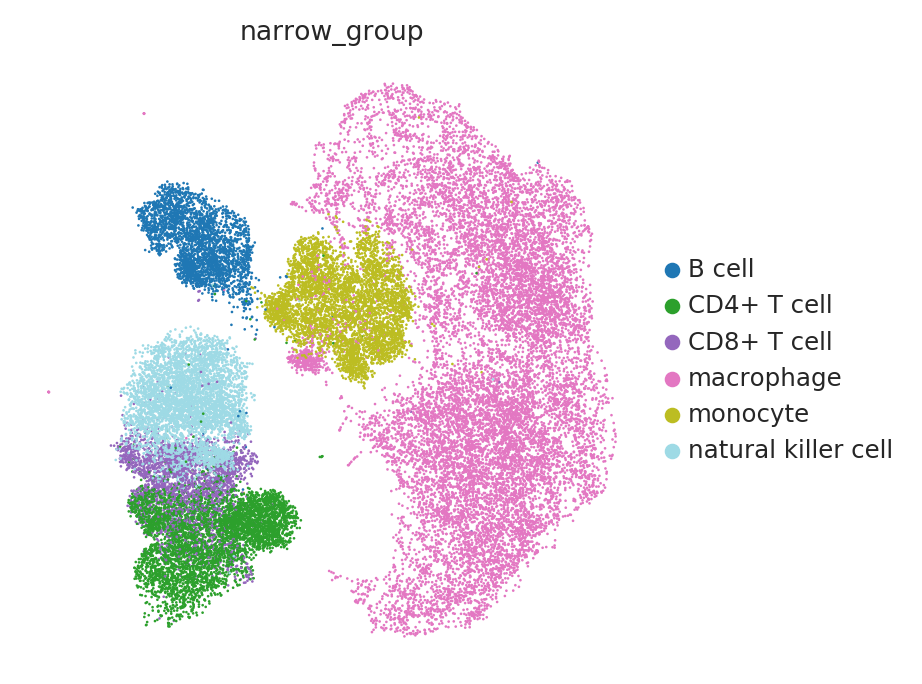

In [27]:
preprocess.remove_color_palettes(adata)
sc.pl.umap(adata, color='narrow_group', palette='tab20', save='__narrow_group')

## Save all figures

In [28]:
# import sys
# # sys.path.append()

# sys.path.append('/home/olga/code/xspecies--olgabot/refactor-bladder-blood-lung-muscle/xspecies')

from plot_utils import save_figures

In [29]:
save_figures(figure_folder)

Saving figures: 0it [00:00, ?it/s]


## Write output adata to file

In [30]:
# # Write BBKNN + UMAP data to file
adata.write(output_file)

In [31]:
output_file

'/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species/concatenated__human-lemur-mouse_10x__one2one_orthologs__blood__preprocessed.h5ad'

In [32]:
! ls -lha $output_file

-rw-r--r-- 1 olga czb 431M Apr 15 16:49 /home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species/concatenated__human-lemur-mouse_10x__one2one_orthologs__blood__preprocessed.h5ad


## Write narrow group names for correlations

In [33]:
' '.join([x.replace(' ',  '\\') for x in sorted(set(adata.obs['narrow_group']))])

'B\\cell CD4+\\T\\cell CD8+\\T\\cell macrophage monocyte natural\\killer\\cell'

In [34]:
adata.obs.groupby(['narrow_group', 'species']).size()

narrow_group         species    
B cell               Mouse           1834
                     Mouse lemur      674
                     Human            230
CD4+ T cell          Mouse            570
                     Mouse lemur     1645
                     Human           2297
CD8+ T cell          Mouse            467
                     Mouse lemur      153
                     Human           1942
macrophage           Mouse            338
                     Mouse lemur       33
                     Human          13737
monocyte             Mouse           1446
                     Mouse lemur     1292
                     Human           1838
natural killer cell  Mouse            535
                     Mouse lemur      374
                     Human           3698
dtype: int64

# Plot correlations

## Append path to import

In [35]:
! cp /home/olga/code/xspecies--olgabot/refactor-bladder-blood-lung-muscle/xspecies/plot_constants.py .

-----
anndata     0.7.5
scanpy      1.7.0rc1
sinfo       0.3.1
-----
anndata             0.7.5
annoy               NA
attr                19.3.0
autoreload          NA
backcall            0.1.0
bbknn               NA
cairo               1.18.2
cffi                1.13.2
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.0
decorator           4.4.1
get_version         2.1
h5py                2.10.0
idna                2.8
igraph              0.7.1
importlib_metadata  0.19
ipykernel           5.1.3
ipython_genutils    0.2.0
jedi                0.15.1
jinja2              2.10.3
joblib              0.14.1
jsonschema          3.2.0
kiwisolver          1.1.0
legacy_api_wrap     0.0.0
leidenalg           0.7.0
llvmlite            0.30.0
louvain             0.6.1
markupsafe          1.1.1
matplotlib          3.1.2
more_itertools      NA
mpl_toolkits        NA
natsort             6.2.0
nbformat            4.4.0
numba               0.46.0
numexpr 

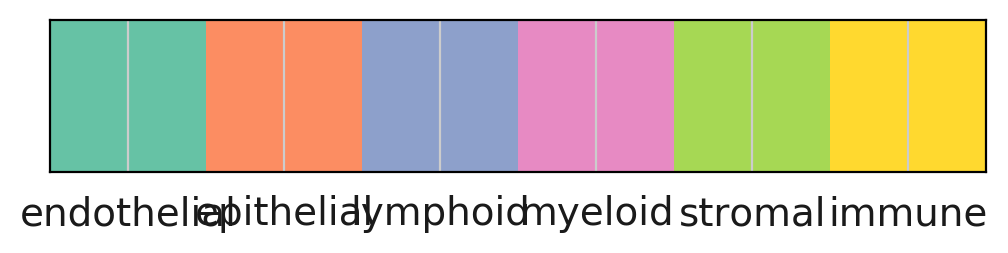

In [36]:
! ls -lha /home/olga/code/xspecies--olgabot/refactor-bladder-blood-lung-muscle/xspecies/

In [37]:
# sys.path.append('/home/olga/code/xspecies--olgabot/refactor-bladder-blood-lung-muscle/xspecies/')

import visualize_correlation as corr_viz

Matplotlib Backend: module://ipykernel.pylab.backend_inline


## Read YAML config

In [38]:
{x: list(y) for x, y in adata.obs.groupby(['compartment_group']).narrow_group.unique().to_dict().items()}

{'lymphoid': ['natural killer cell', 'B cell', 'CD8+ T cell', 'CD4+ T cell'],
 'myeloid': ['monocyte', 'macrophage']}

In [39]:
sorted(adata.obs.broad_group.unique())

['B cell', 'T cell', 'macrophage', 'monocyte', 'natural killer cell']

In [40]:
%%file blood_config.yml

all_groups:
    {
    "compartment": [ 'lymphoid', 'myeloid'],
    "narrow": ['B cell',
 'CD4+ T cell',
 'CD8+ T cell',
               'macrophage',
 'monocyte',
 'natural killer cell'],
    "broad": ['B cell', 'T cell', 'macrophage', 'monocyte', 'natural killer cell',],
}

compartment_narrow:
    {
    'lymphoid': ['natural killer cell', 'B cell', 'CD8+ T cell', 'CD4+ T cell'],
    'myeloid': ['macrophage', 'monocyte',]
}


Overwriting blood_config.yml


In [41]:
config_yaml_path = 'blood_config.yml'


with open(config_yaml_path) as file:
    config = yaml.full_load(file)
    
groups = config["all_groups"].keys()
groups

dict_keys(['compartment', 'narrow', 'broad'])

## Read dataframes

In [42]:
correl_dir = os.path.join('/home/olga/data_lg/data_sm_copy/tabula-microcebus/analyses/xi-correlation/', tissue)
within_celltypes_filenames = glob.glob(os.path.join(correl_dir, 'xi__narrow_group__drop_if_either_zero*.parquet'))

dfs_within = defaultdict(list)
for filename in within_celltypes_filenames:
    for group in groups:
        if group in filename:
            df = pd.read_parquet(filename)
            df = df.rename(
                columns={group + "_group": "cell_ontology_class"})
            dfs_within[group].append(df)
            
len(dfs_within)

1

## Visualize correlation

### Sset output folder

In [43]:
output_folder = '/home/olga/googledrive/TabulaMicrocebus/analysis/cross-species--bladder-blood-lung-muscle/blood/correlation'
! mkdir -p $output_folder

In [45]:
import visualize_correlation as corr_viz

key: all_groups
key: compartment_narrow
species2                                   Mouse  Mouse lemur
species1 cell_ontology_class iteration                       
Human    B cell              0          0.407473     0.441331
                             1          0.537040     0.394443
                             2          0.472336     0.407650
                             3          0.410113     0.467867
                             4          0.470354     0.528741


/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing 

species2                                      Human     Mouse
species1    cell_ontology_class iteration                    
Mouse lemur B cell              0          0.399478  0.356761
                                1          0.415779  0.421963
                                2          0.437182  0.396732
                                3          0.425387  0.325038
                                4          0.364757  0.417529


/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing 

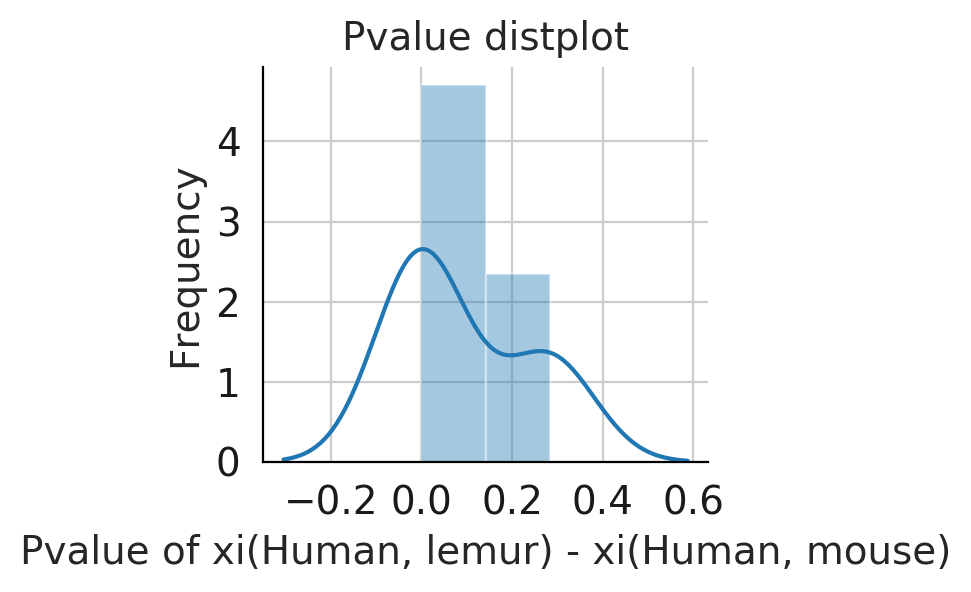

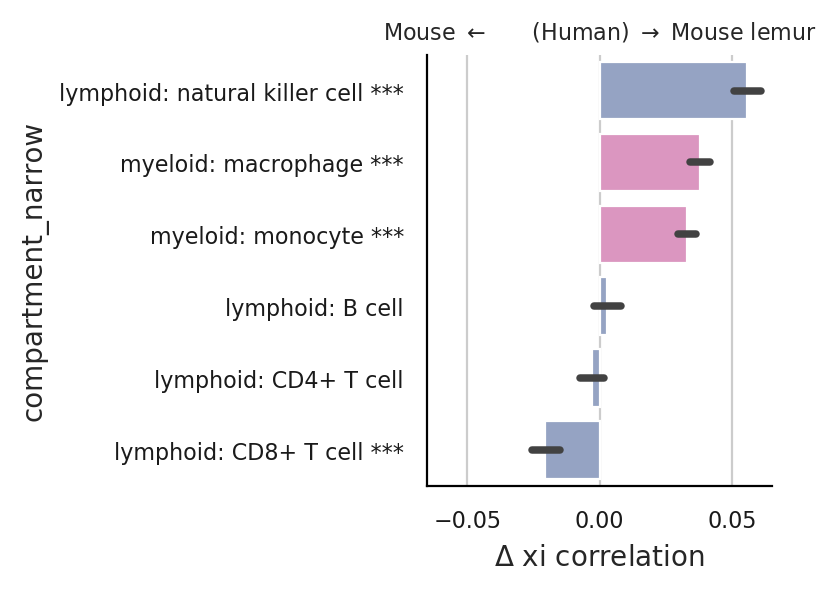

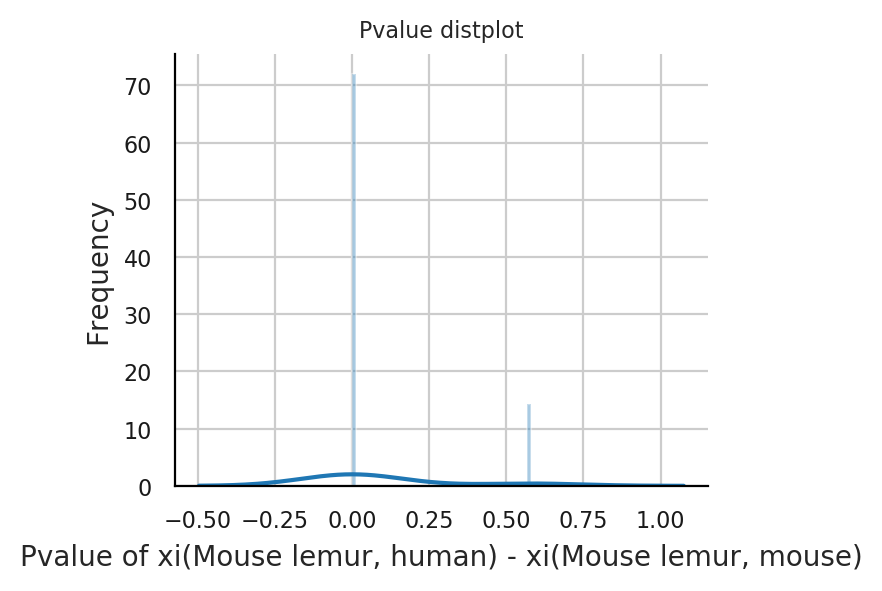

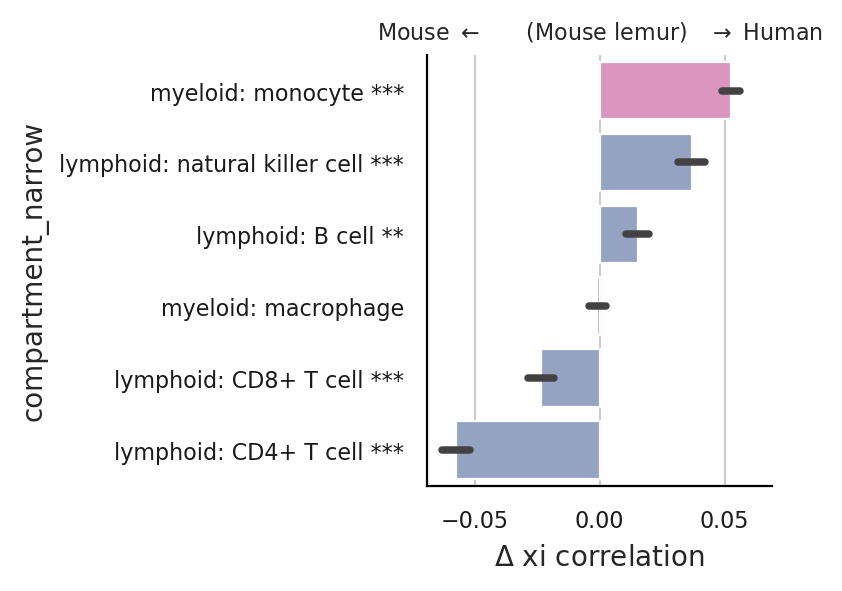

In [47]:
pvalue_level_kws=dict(level3=1e-10, level2=1e-5, level1=1e-3)

for key, dictionary in config.items():
    print(f'key: {key}')
    if "all_groups" == key:
        continue
    if "significant" in key:
        continue
#         df = pd.concat(dfs_within["narrow"], ignore_index=True)
#         narrow_celltypes_significant = []
#         for key, value in config["significant_compartment_narrow"].items():
#             narrow_celltypes_significant.extend(value)
#         df = df[df['cell_ontology_class'].isin(
#             narrow_celltypes_significant)]
    else:
        df = pd.concat(dfs_within["narrow"], ignore_index=True)
    corr_viz.corr_diff_within(df, "Human", dictionary, pvalue_level_kws=pvalue_level_kws)
    corr_viz.corr_diff_within(df, "Mouse lemur", dictionary, pvalue_level_kws=pvalue_level_kws)

for i in plt.get_fignums():
    fig = plt.figure(i)
    fig.set_size_inches(4, 3)
    sns.despine(fig=fig)
    fig.tight_layout()
    fig.savefig(os.path.join(output_folder, "figure%d.png" % i))
    fig.savefig(os.path.join(output_folder, "figure%d.pdf" % i))